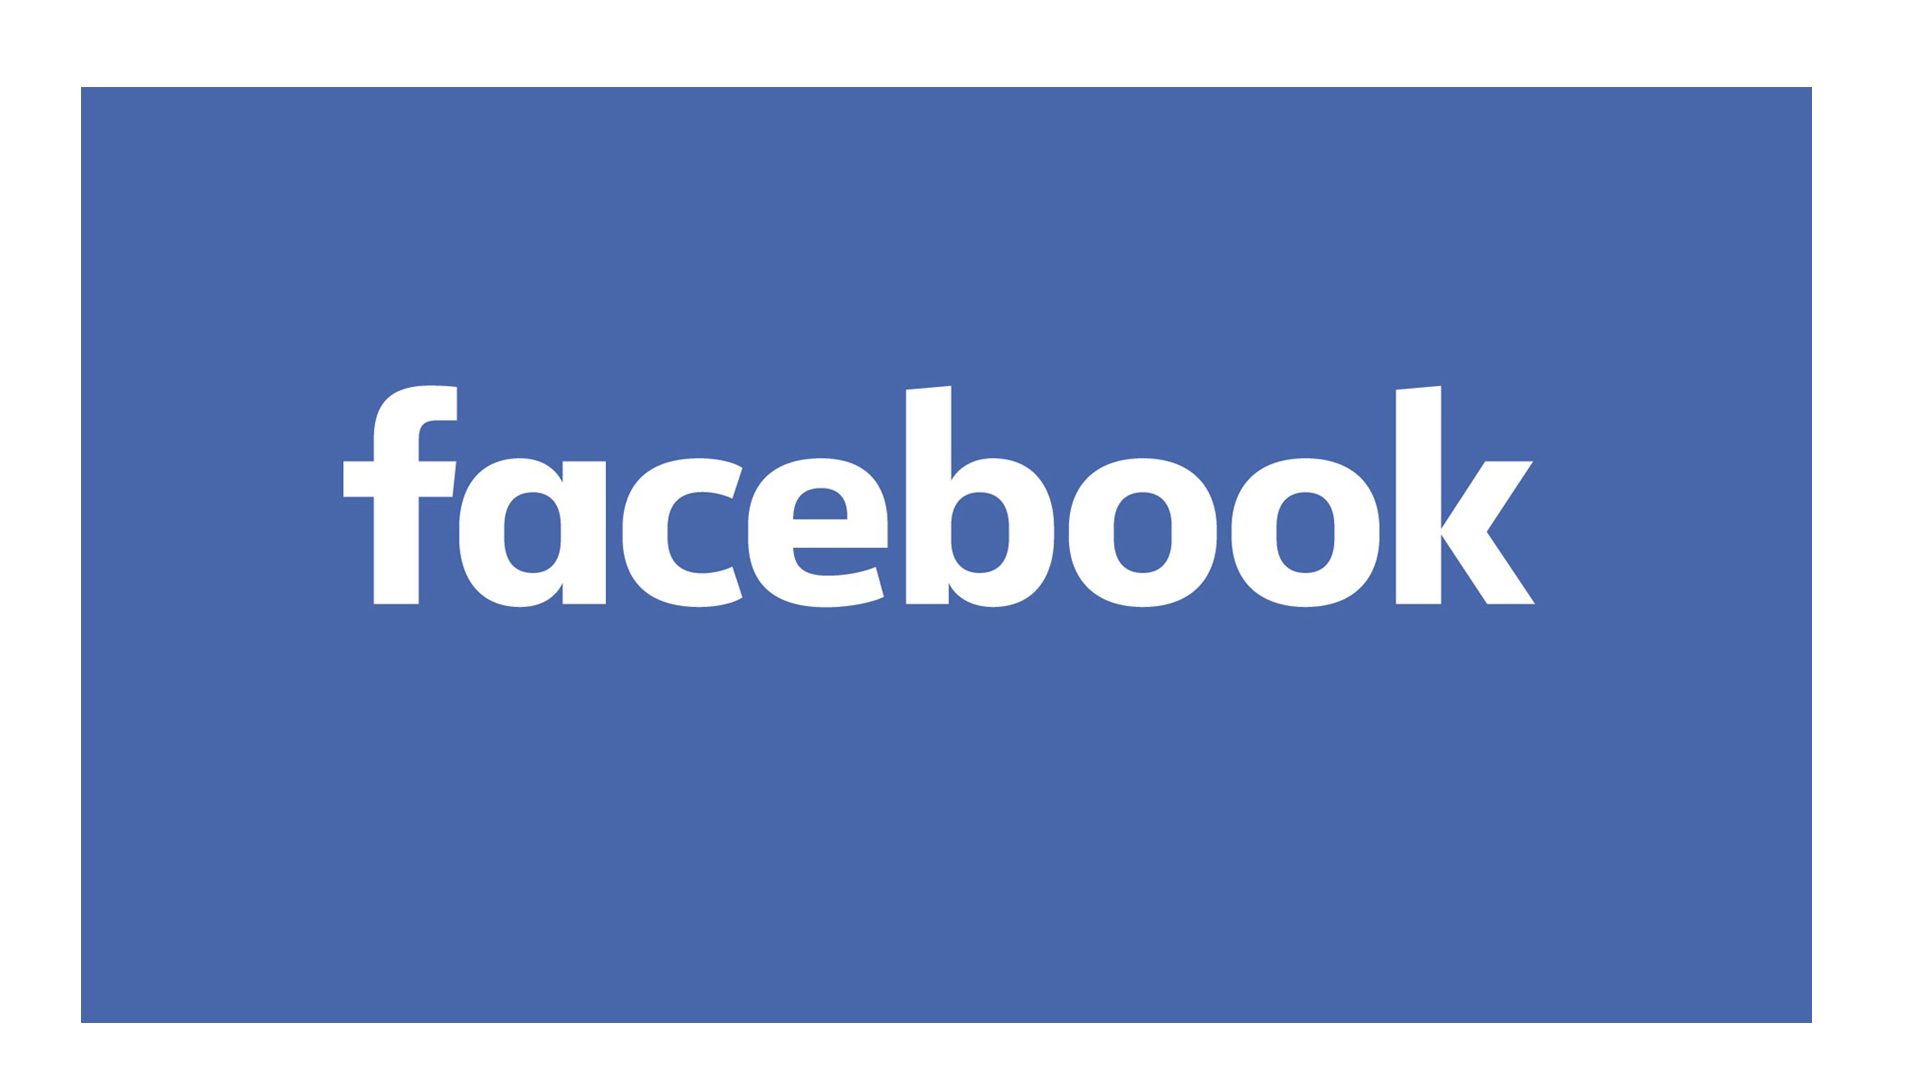

<p style="font-size:32px;text-align:center"> <b>Social Network Graph Link Prediction - Facebook Challenge</b> </p>

# 1. Introduction

## 1.1 Problem Statement: 
Imagine each user of a social media platform aka social network vis. Facebook, Instagram, Twitter, LinkedIn is represented using a $\bullet$ or dot. Now, say, friends and followers in a social network represented by $\bullet$ are joined/connected using an edge. This whole structure is referred as Graph. I'll explain some of the important terminolgies in just a while.

Given a directed social graph, we have to predict missing links to recommend users (Link Prediction in graph).

## 1.2 Business Problem
Facebook has friend recommendations popularly known as "People You May Know". Similar recommendation strategy at Instagram, is referred as 'Suggestions for You'. Our goal in this project is to determine, that in a social graph, say, if $u_1$ and $u_2$ are friends. Likewise, if $u_2$ and $u_3$ are friends. Are there any chances that, both $u_1$ and $u_3$ might be friends as well? Is there is a possible link between them? Can I recommend $u_1$ to $u_3$ or vice-versa, in "People You May Know"? 

Here's one way to represent a social network:

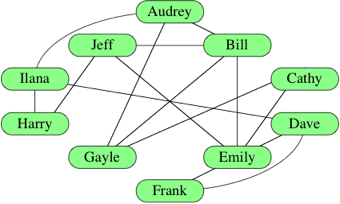

A line between the names of two people means that they know each other. If there's no line between two names, then the people do not know each other. The relationship "know each other" goes both ways; for example, because Audrey knows Gayle, that means Gayle knows Audrey.


This social network is a **graph**. The names are the **vertices** of the graph. (If you're talking about just one of the vertices, it's a **vertex**.) Each line is an **edge**, connecting two vertices. We denote an edge connecting vertices $u$ and $v$ by the pair $(u,v)$. Because the "know each other" relationship goes both ways, this graph is **undirected**. An undirected edge $(u,v)$ is same as the $(v,u)$  Later, we'll see **directed** graphs, in which relationships between vertices don't necessarily go both ways. In an undirected graph, an edge between two vertices, such as the edge between Audrey and Gayle, is **incident** on the two vertices, and we say that the vertices connected by an edge are **adjacent** or **neighbors**. The number of edges incident on a vertex is the **degree** of the vertex.


Audrey and Frank do not know each other. Suppose that Frank wanted to be introduced to Audrey. How could he get an introduction? Well, he knows Emily, who knows Bill, who knows Audrey. We say that there is a **path** of three edges between Frank and Audrey. In fact, that is the most direct way for Frank to meet Audrey; there is no path between them with fewer than three edges. We call a path between two vertices with the fewest edges a **shortest** path. We've highlighted that particular shortest path below:

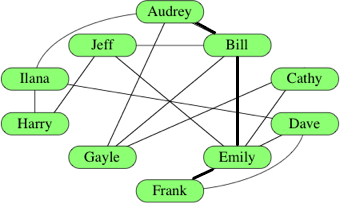

When a path goes from a particular vertex back to itself, that's a **cycle**. The social network contains many cycles; one of them goes from Audrey to Bill to Emily to Jeff to Harry to Ilana and back to Audrey. There's a shorter cycle containing Audrey, shown below: Audrey to Bill to Gayle and back to Audrey. What other cycles can you find?

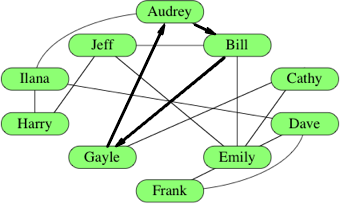

Sometimes we put numeric values on the edges. For example, in the social network, we might use values to indicate how well two people know each other. To bring in another example, let's represent a road map as a graph. Assuming that there are no one-way streets, a road map is also an undirected graph, with cities as vertices, roads as edges, and the values on edges indicating the distance of each road. For example, here's a road map, not to scale, of some of the interstate highways in the northeastern U.S., with distances next to edges:

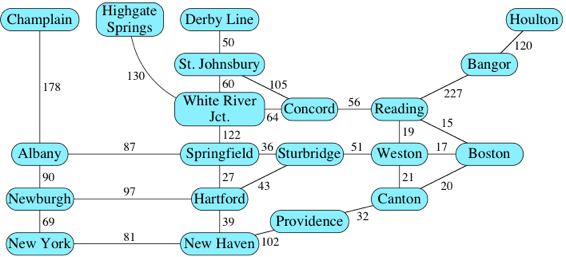

The general term we use for a number that we put on an edge is its **weight**, and a graph whose edges have weights is a **weighted graph**. In the case of a road map, if you want to find the shortest route between two locations, you're looking for a path between two vertices with the minimum sum of edge weights over all paths between the two vertices. As with unweighted graphs, we call such a path a **shortest path**. For example, the shortest path in this graph from New York to Concord goes from New York to New Haven to Hartford to Sturbridge to Weston to Reading to Concord, totaling 289 miles.

The relationship between vertices does not always go both ways. In a road map, for example, there could be one-way streets. Or here's a graph showing the order in which a goalie in ice hockey could get dressed:

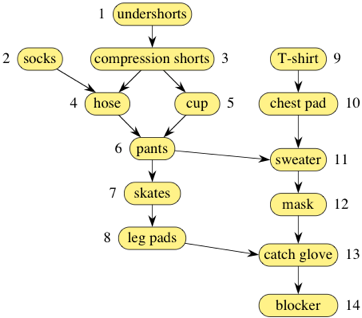

Now edges, shown with arrows, are **directed**, and we have a **directed graph**. Here, the directions show which pieces of equipment must be put on before other pieces. For example, the edge from chest pad to sweater indicates that the chest pad must be put on before the sweater. The numbers next to the vertices show one of the many possible orders in which to put on the equipment, so that undershorts go on first, then socks, then compression shorts, and so on, with the blocker going on last. You might have noticed that this particular directed graph has no cycles; we call such a graph a **directed acyclic graph**, or **dag**. Of course, we can have **weighted directed graphs**, such as road maps with one-way streets and road distances.

We use different terminology with directed edges. We say that a directed edge **leaves** one vertex and **enters** another. For example, one directed edge leaves the vertex for chest pad and enters the vertex for sweater. If a directed edge leaves vertex $u$ and enters vertex $v$, we denote it by $(u,v)$ and the order of the vertices in the pair matters. The number of edges leaving a vertex is its **out-degree**, and the number of edges entering is the **in-degree**.

As you might imagine, graphs—both directed and undirected—have many applications for modeling relationships in the real world.


#### Graph sizes
When we work with graphs, it's helpful to be able to talk about the set of vertices and the set of edges. We usually denote the vertex set by $V$ and the edge set by $E$. When we represent a graph or run an algorithm on a graph, we often want to use the sizes of the vertex and edge sets in asymptotic notation.

> Credits: Khan Academy

## 1.3 Data Overview
Taken data from Facebook's recruiting challenge on kaggle: https://www.kaggle.com/c/FacebookRecruiting. Mainly, we have two files apart from sample submission files:

- train.csv contains the directed social graph, represented in a 2-column csv (source_node, destination_node).

- test.csv contains a list of nodes to recommend other nodes to in a 1-column csv (source_node). 

train.csv contains two columns-source_node and destination destination_node in graph:
    
    - Data columns (total 2 columns):  
    - source_node         int64  
    - destination_node    int64  
    
We believe that the data we are given is from Instagram. Reason being, it follows the structure of a directed graph. Say, $u_1$ might be following $u_2$. In turn, $u_2$ might be following $u_3$, $u_3$ might be following $u_4$, so and so forth. If you take a sneak peek at the dataset, you will see that they've sorted the users by their associated numbers i.e. $u_1$ comes first followed by $u_2$, $u_3$, $u_4$...so on so forth. Also, just to let you know, we have 1862220 ~ 1.86M users and 9437520 ~ 9.43M edges in our directed graph. Had you been an engineer at Facebook, you would have more meta-data at hand like cities both users live in, they attended the same college or not etc. But for this dataset, they have only provided us users and their connections with other users in this graph-based structure. This is a purely graph-based link prediction problem.

Note: We are only given one snapshot of the data at time $t$ i.e. this dataset doesn't change with time. It stays same or is static in nature. Contrarily, in real world, our network grows dynamically. Today, I might now person $X$, but when I joined in a company, I met him and eventually became friends with him. So, there is a high probability of social network recommending me this person as a suggested person to follow on platform. Had I been given with some information about how this graph evolves, which is available in real world, this competition would have been more interesting. Nonetheless, we will work with what we have at our hands.

## 1.4 Mapping the Problem into Supervised Learning Problem

- Mapping this to a binary classification task with 0 implying an absence of an edge/connection and 1 implying the presence of an edge/connection between two users $u_i$ and $u_j$.

- How to featurize this data? Say, $u_1$ follows $u_3$, $u_4$ and $u_5$. Likewise, $u_2$ follows $u_3$, $u_4$ and $u_6$. If you see closely, both $u_1$ and $u_2$ show similar interests; that's why it makes perfect sense to recommend $u_1$ to follow $u_6$ and $u_2$ to follow $u_5$. Similarly, $u_1$ might wanna follow $u_2$ or vice-versa. Hence, common vertices being followed by both users might be a good feature to consider. You might wanna see is there an edge already between $u_1$ and $u_2$? So that, I can suggest one of them to follow back the other person? These are referred as graph-based features. Featurization is main task to be thought of, rest is simple classification for which we already know many algorithms.

- In a nutshell, we are going to generate training samples of good and bad links from given directed graph and for each link we will extract some features like no of followers, is he followed back, page rank, katz score, adar index, some svd fetures of adj matrix, some weight features etc. and will train machine learning models based on these features to predict link. 

- Some reference papers and videos :  
    - https://www.cs.cornell.edu/home/kleinber/link-pred.pdf
    - https://www3.nd.edu/~dial/publications/lichtenwalter2010new.pdf
    - https://www.youtube.com/watch?v=2M77Hgy17cg

## 1.5 Business Objectives and Constraints  

- No low-latency requirement. Social Platforms usually update their logs in few hours, or in overnights, or at weekends, or even sometimes in weeks. I need not to recommend a suggestion to follow other user, immediately when the user logs in. There is no problem if it takes from few hours to a couple of days. We can typically store this information in a data structure like Hash Tables, and can load it up whenever user logs in.

- Predicting the Probability of a link/connection is useful so as to recommend the highest probability links to a user. If you have ever looked at, there is only a small portion of the visual area, where suggestions are typically showed up. This area usually shows most recommended suggestions generally in the range of 3 to 10. Now, a single user may follow 100s of people based on his/her other following list, right? But available space is less. Hence, we need to rank our suggestions in such a manner that only most likely recommendations get suggested in that limited space. And this is where probability comes into the picture. We need to rank our recommendations using probability scores in order to recommend most probable users that the user should follow.

- We gotta suggest connections which are most likely to be correct and we should try not to miss out any connections. In machine learning lingo, this can be referred as high precision and high recall. If I have two users, $u_i$ and $u_j$. And, if I'm making a recommendation of $u_j$ to $u_i$, then $u_i$ should be following $u_j$-that should be the case. This is high precision. And if $u_i$ should be following $u_j$, I should be recommending $u_j$. This is high recall.

## 1.6 Performance Metrics for Supervised Learning  

- As we saw in the business objectives and constraints section, that we want high precision and high recall values for the predictions, an appropriate metric in this case, which could aptly represent both at the same time would be F1-score. It's value ranges from 0 to 1 where higher and more closer to 1 is better. And as we know that the standard F1-score is used in binary classification.

- Confusion Matrix: Helps in interpreting results.

- There is another metric you can consider: Precision @ top k. It works as follows: as we know we have only a limited space to recommend users. Say, we recommended k users to a particular user, out of these k suggested/recommended users, how many are correct suggestions/recommendations/predictions? We can try it out for sure, but for simplicity, we will limit ourselves to first two metrics only. 

## 1.7 Loading Libraries and Packages

In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

Most people might be familiar with most of the above packages except one:```networkx```. ```NetworkX``` is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks aka graphs. With ```NetworkX``` you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Throughout this whole project, we will be storing data at intermediate steps. So, that if some issue shows up, we can revert back to the last checkpoint, where we saved our data earlier.

Now, let's quickly load our ```train.csv```:

In [ ]:
#reading graph
if not os.path.isfile('data/after_eda/train_woheader.csv'):
    traincsv = pd.read_csv('data/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of duplicate entries: ",sum(traincsv.duplicated()))
    traincsv.to_csv('data/after_eda/train_woheader.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g=nx.read_edgelist('data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


As you can see, we are loading our data ```train.csv``` with the help of ```pandas``` package. Later, we are looking for duplicated fields and missing values in our dataset. And at the end, we are creating the network with the help of ```networkX``` library imported as ```nx```. We are making use of a method called, ```read_edgelist```, which basically takes list of edges as input and creates a network out of it. You can see, we are using our train file without header(source_node, destination_node) and creating a directed graph using ```nx.DiGraph()```. Once, we are done reading file and creating the network; we can do lots of interesting things with ```nx.info()```. 

Later, we have printed our some statistical information about the network like number of nodes, edges and average in-degree and out-degree across all the vertices. If you recall, the number of edges leaving a vertex is its *out-degree*, and the number of edges entering is the *in-degree*. On average, there are 5 vertices originating from each vertex and 5 vertices entering into each vertex.

## 1.8 Displaying a Sub-graph

Imagine, you have a graph with lots of vertices and lots of edges. A subgraph is a graph created by a subset of vertices and their associated edges from the original graph.

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


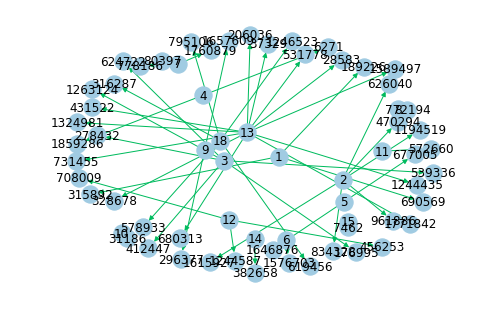

In [ ]:
if not os.path.isfile('train_woheader_sample.csv'):
    pd.read_csv('data/train.csv', nrows=50).to_csv('train_woheader_sample.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

We are only making use of top 50 rows from our training dataset without header. Later, we are drawing the subgraph with ```nx.draw```. And plotting it with help of matplotlib. We are providing several parameters like-color of nodes, color of edges, width of edges etc.

We can clearly see how a graph with 50 edges and 66 nodes looks like. Keep in mind, that this ain't the original graph but a part of it. Now, we have learnt some basic usage of ```NetworkX``` library; let's perform some exploratory data analysis.

# 2. Exploratory Data Analysis

In [ ]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


Here, we have obtained number of unique persons/users or nodes present in our graph. Remember, ```g``` is an object in which we have stored our entire graph for manipulation, we are making use of ```nodes``` and ```len``` method to pull out total number of nodes.

## 2.1 Number of Followers for Each Person

We wanna know how many followers are there for each person/user/node. If we have an incoming edge from a user $u_i$ to user $u_j$, we can say that $u_i$ follows $u_j$. Hence, in-degree of a node tells us about the number of followers of that node.

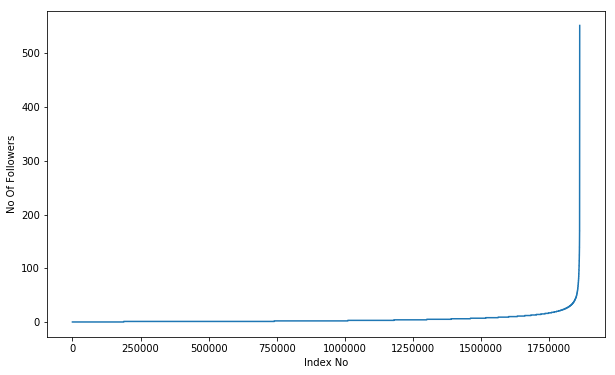

In [ ]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

So, I am here basically sorting the list of all the in-degrees of all the nodes/users/persons present in the dataset. Later, I am plotting a graph in which ```Index No``` i.e. index number of the user is plotted on x-axis while ```No of Followers``` i.e. followers of that particular node/user are plotted on y-axis.

This graph shows that, there are few users which have 0 followers i.e. no one is following them. And there is at least one user which has more than 500 followers. We can see how sharply this graph rises in the extreme right i.e. it's steep. This tells you that most of our users have few followers i.e. somewhere around 40. There are only a subset of users which have more than 40 followers. 

There is a huge scale difference in this plot, let's zoom in this graph a little bit:

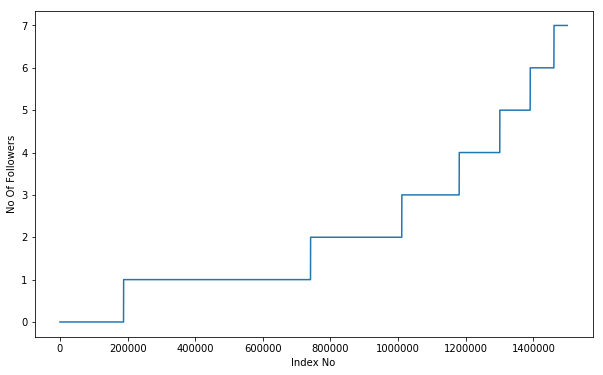

In [ ]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

Earlier I was visualizing between 0th and 1.86Mill user. But here, I am visualizing between 0th and 1.4Mill users. If you smooth this curve, even this curve is fairly steep. Users between 0 and 200000 have 0 followers, between 200000 and 800000 have 1 follower, between 800000 and 1000000 have 2 followers..so on and so forth. Looking at this plot, we can say that almost 1.4M users have <= 7 followers. Let's cement this conclusion by using box-plot:

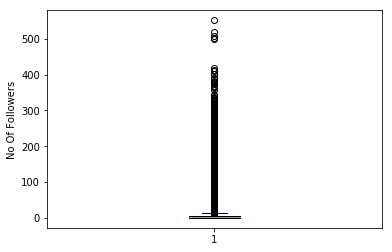

In [ ]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

As we can see, it's really difficult to read this plot as your 25th, 75th percentile are very small. There are bunch of outliers, which says that there are few users who have lots of followers but there are many people who don't have that many followers.

In [ ]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


If I sort all of my indegrees/followers, looking at only 90-100th percentile, we can see that 90% of the users have less than or equal to 12 followers, 91% of the users have less than or equal to 13 followers. Likewise, 99% of the users have less than equal to 40 followers only. And the value suddenly rises at 100th percentile. Let's take even more closely between 99-100th percentile.

In [ ]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


We can see, that 99.9 of the users have less than or equal to 112 followers. There are only 0.1 percentile of users who have more than 112 followers. Hence, the key-takeaway is that there are very few people who have large number of followers.

D:\installed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


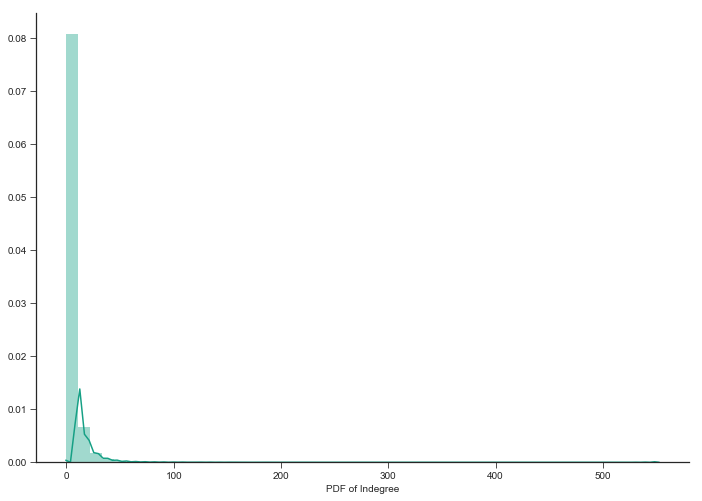

In [ ]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

And ofcourse, we can plot the probability density function aka PDF of Indegree or Number of Followers. We can see there are lots of people with few followers and only a handful of users have large number of followers. We have smoothed out the curve, you can see a sharp spike wherein people have less than 40 followers.

## 2.2 Number of People Each Person is Following

Likewise, to indegree being equivalent to number of followers; outdegree of a node signifies the number of users followed by that node. Remember, ```g``` is an object in which we have stored our entire graph for manipulation.

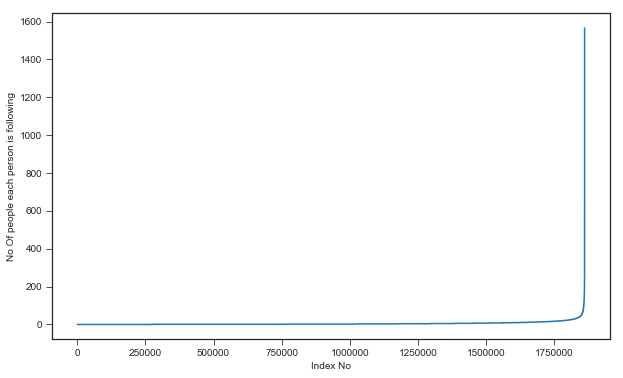

In [ ]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

So, I am here basically sorting the list of all the out-degrees of all the nodes/users/persons present in the dataset. Later, I am plotting a graph in which ```Index No``` i.e. index number of the user is plotted on x-axis while No of people each person is following are plotted on y-axis.

This graph shows that, there are few users which are following close to 1500 people. And there are many users which are following very few people. We can see how sharply this graph rises in the extreme right i.e. it's steep. This tells you that most of our users are following very few people while there are only a subset of users who are following many many people. Makes sense right?

There is a huge scale difference in this plot, let's zoom in this graph a little bit:

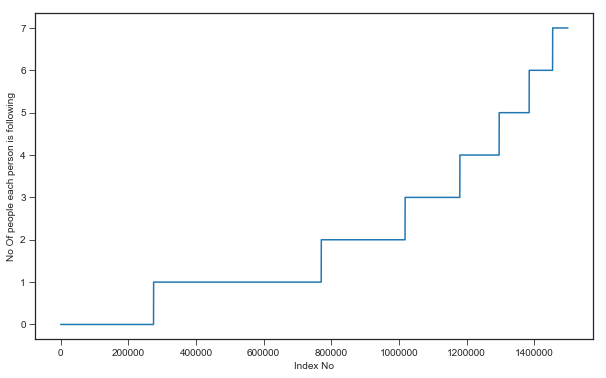

In [ ]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

Earlier I was visualizing between 0th and 1.86Mill user. But here, I am visualizing between 0th and 1.4Mill users. If you smooth this curve, even this curve is fairly steep. Users between 0 and 240000 are following noone, between 240000 and 790000 are following 1 user, between 790000 and 1200000 are following 2 users..so on and so forth. Looking at this plot, we can say that almost 1.4M users are following <= 7 users. Let's cement this conclusion by using box-plot:

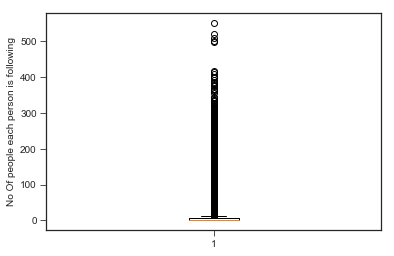

In [ ]:
plt.boxplot(outdegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

As we can see, it's really difficult to read this plot as your 25th, 75th percentile are very small. There are bunch of outliers, which says that there are few users who are following lots of users but there are many people who are not following many users.

In [ ]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


If I sort all of my outdegrees/number of people I'm following list, looking at only 90-100th percentile, we can see that 90% of the users are following less than or equal to 12 users, 91% of the users are following less than or equal to 13 users. Likewise, 99% of the users are following less than equal to 40 users only. And the value suddenly rises at 100th percentile. Let's take even more closely between 99-100th percentile.

In [ ]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


We can see, that 99.9 of the users are following less than or equal to 123 users. There are only 0.1 percentile of users who are following more than 112 users. Hence, the key-takeaway is that there are very few people who are following large number of users.

D:\installed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


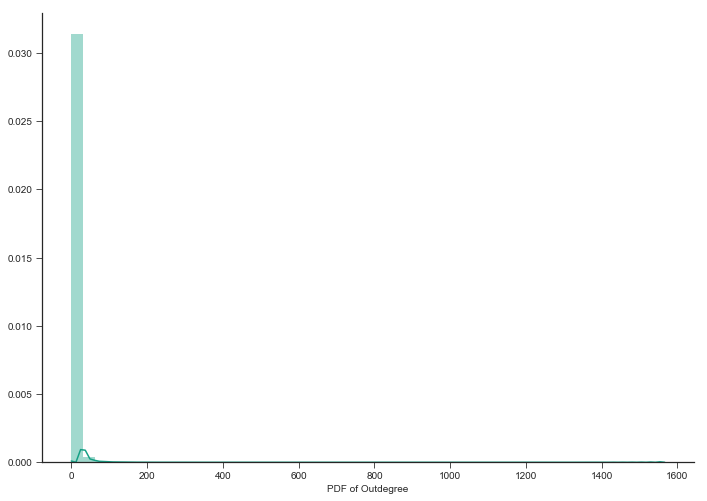

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

And ofcourse, we can plot the probability density function aka PDF of Outdegree or Number of People Following. We can see there are lots of people with few following list and only a handful of users having large number of following list. We have smoothed out the curve, you can see a sharp spike wherein people are following less than 40 users.

In [ ]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


It's pretty evident from the above cell's output that, there are 274k people who are not following anyone and account for about 14.74% of the total users.

In [ ]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


Also, there are 188k people who don't have any follower at all and their proportion in the whole dataset is around 10.09%.

In [ ]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


This is an interesting stat. There is not a single user which isn't followed by anyone and who is not following someone either.

## 2.3 Both Followers + Following 

Now, we have done in-degree analysis i.e. followers and out-degree analysis i.e. number of people following, how about we combine both? For a directed graph, the sum of in-degree and out-degree is referred as degree of the vertex. Remember, ```g``` is an object in which we have stored our entire graph for manipulation.

In [ ]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

Here, I've just summed up the indegrees and outdegrees of graph ```g```. Later, I am creating and storing the values in a ```numpy``` array. 

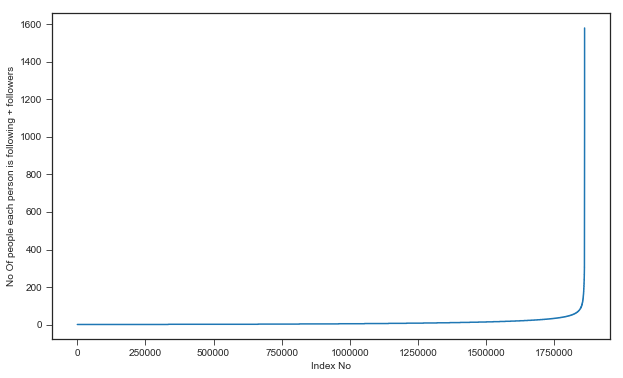

In [ ]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

So, I am here basically sorting the list of all the in-out-degrees of all the nodes/users/persons present in the dataset. Later, I am plotting a graph in which Index No i.e. index number of the user is plotted on x-axis while No of people each person is following + followers are plotted on y-axis.

This graph shows that, there are few users which are following as well as being followed by close to 1500 people. And there are many users which are following as well as being followed by very few people. We can see how sharply this graph rises in the extreme right i.e. it's steep. This tells you that most of our users are following and being followed by very few people while there are only a subset of users who are following as well as being followed by many many people. Makes sense right?

There is a huge scale difference in this plot, let's zoom in this graph a little bit:

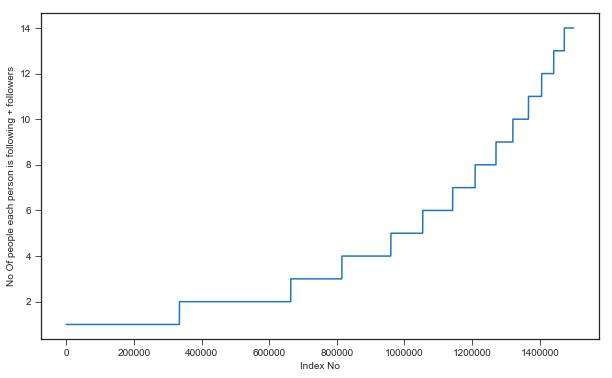

In [ ]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

Earlier I was visualizing between 0th and 1.86Mill user. But here, I am visualizing between 0th and 1.4Mill users. If you smooth this curve, even this curve is fairly steep. Users between 0 and 260000 are following noone and are not being followed by anyone either, between 260000 and 630000 are following 2 users and are being followed by two users, between 630000 and 820000 are following 3 users..so on and so forth. Looking at this plot, we can say that almost 1.4M users are following <= 14 users. Let's cement this conclusion by using box-plot:

In [ ]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


If I sort all of my in-outdegrees/number of people I'm following as well as being followed list, looking at only 90-100th percentile, we can see that 90% of the users are following and being followed by less than or equal to 24 users, 91% of the users are following and being followed by less than or equal to 26 users. Likewise, 99% of the users are following and being followed by less than equal to 79 users only. And the value suddenly rises at 100th percentile. Let's take even more closely between 99-100th percentile.

In [ ]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


We can see, that 99.9 of the users are following and being followed by less than or equal to 221 users. There are only 0.1 percentile of users who are following and being followed by more than 221 users. Hence, the key-takeaway is that there are very few people who are following and being followed by large number of users.

In [ ]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


It's pretty evident from the above cell's output that, there are 334k people who are either following anyone or being followed by at least one user. The minimum in-out degree is 1.

In [ ]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 1579
1  persons having maximum no of followers + following


The maximum in-out degree is 1579 signifying that there is only person who has number of followers and number of people following count to be 1579.

In [ ]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 1320326


Also, there are around 132k people who's count of followers and following is less than 10.

In [ ]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


The concept of "strongly connected" and "weakly connected" graphs are defined for directed graphs as follows:

> A digraph is strongly connected if every vertex is reachable from every other following the directions of the arcs. i.e., for every pair of distinct vertices $u$ and $v$ there exists a directed path from $u$ to $v$.

> A digraph is weakly connected if when considering it as an undirected graph it is connected. i.e., for every pair of distinct vertices $u$ and $v$ there exists an undirected path (potentially running opposite the direction on an edge) from $u$ to $v$.

In both cases, it requires that the undirected graph be connected, however strongly connected requires a stronger condition. You might also have that if a digraph is strongly connected, it is also weakly connected.

# 3. Posing a Problem as Classification Problem 

## 3.1 Generating Some Edges which are not Present in Graph for Supervised Learning

If I wish to pose my problem as a classification problem, what I can do? I might try representing not having an edge by '0' while having an edge in-between by '1'. But the problem is, in my dataset, I have only those pair of vertices for which there exists an edge. If I'll try to pose this as a binary classification task, target variable for all the pair of vertices will be '1' as there is no such pair for which there is not an edge. As my dataset or train.csv file contains only those vertices which have an edge between them, I will have to add such pairs between which there exists no edge and will label them with '0'. Now, here is a catch: we have 1.86M nodes and 9.43M edges. Now, given these many nodes, how many edges are possible? For every vertex $u_i$, I can have $n-1$ directed edges provided if there are total $n$ vertices. Likewise, for $n$ nodes, we will have $n(n-1)$ directed edges. For 1.86M nodes, number of edges will be $1.86 \times 10^6(1.86 \times 10^{6} - 1)$. In our dataset, only a small fraction of this big number occurs. Hence, the total number of edges are pretty large, and only a subset of these edges are present in my dataset i.e. ```train.csv```. Let's call the edges which aren't part of ```train.csv``` to be **"bad edges"** i.e. edges which are possible but aren't present in ```train.csv```. From the set of bad edges, we will sample data points randomly. So, in a nutshell what am I doing? I have my ```train.csv``` which is giving me class '1' labeled pair of vertices and for class '0' labeled pair of vertices, I am creating a random subset of pair of vertices between which there could exist an edge but there is no edge. Also, it's always good to have a balanced dataset such that distribution of points labeled with '0' and '1' stays roughly same. So, to achieve this, let's create a random subset of 9.43M pairs of vertices between which there is no edge. Sounds okay right? There is another thing as a sanity check. Say, there are nodes:$u_1$, $u_2$, $u_3$ and $u_4$. Now, imagine, there are directed edges as follows: $u_1 \longrightarrow u_2$, $u_2 \longrightarrow u_3$, $u_3 \longrightarrow u_4$. As there exists no edge, between $u_1$ and $u_3$, I can label this pair as '0' and can add this to our ```train.csv```. Likewise, for $u_1$ and $u_4$, and for $u_2$ and $u_4$. We will generate bad links/edges from graph which are not in graph or ```train.csv``` and whose shortest path is greater than 2. Reason? Look at the example, we just gave, $u_1$ follows $u_2$, and $u_2$ inturn follows $u_3$. If I will create $u_1$ follows $u_3$ as a new data point; there is very high chance that $u_1$ will eventually follow $u_3$; because these three could be friends already. Probably $u_1$ doesn't know that $u_3$ exists on social platform yet. So, what we are gonna do? We will avoid adding pair of vertices where length of the path is less than or equal to 2. If you see closely, the length of the shortest path between $u_1$ and $u_3$ is 2. There could be many paths; but we are only focusing on shortest path. Hence, if length of the shortest path between vetices $u_i$ and $u_j$ is less than or equal to 2, we will not add it as a '0' labeled point in our dataset. But look at $u_1$ and $u_4$, the length of shortest path is 3 which is > 2 . So, we will let those pairs of vertices which have a path-length of greater than 2, potentially present in our datset as a '0' labeled data point. Potentially-as we are going to randomly sample data points. 

In [ ]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('data/after_eda/missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('data/after_eda/train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('data/after_eda/missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('data/after_eda/missing_edges_final.p','rb'))

Wall time: 5.08 s


So, we are going to create same number of '0' labeled pairs of vertices as '1' labeled pairs of vertices i.e. 9.43M. Then, I am going to randomly sample a pair of vertices u_a and u_b. Now, I am gonna check is there an edge betweem them or no? If there is no edge, I will check whether the length of the shortest path between them is greater than 2 or no. If it is, I will add it to a list called ```missing_edges```. These are infact my '0' labeled pairs of vertices.

In [ ]:
len(missing_edges)

9437519

And as we had said, we have randomly sampled 9.43M pairs of vertices for which there doesn't exist an edge and for whom shortest path length > 2. We have our balanced dataset now with us. Now, we require to featurize our vertices in some manner so that, we can later perform classification.

## 3.2 Train and Test Data Split

Now given that we have our datset, having data points and their associated labels. Half of these labels are class '1', and other half are class '0'. At the end of the day, we have to split our dataset into train and test. But, there is one problem; lemme explain you what. In real world, had I been an engineer at Facebook or Instagram, I'd have had an evolving or dynamic dataset that changes over time. Reason? Because some people would have added/followed other people after some time. This implies that this data would be temporaly changing. Now, if that would have been the case, we needed to build our dataset considering this temporal nature. Say, I have a model at time $t$ and the other model after sometime $t+30$. Now, if I productionize my model at time $t$, I would want to predict edges. And then I'll validate those predictions as model which is productionized at time $t$, starts showing recommendations from the day one and then I will have actual values to see whether users are following their friends or not. Hence, I'll have data over next 30 days when this model is productionized. So, you'll be doing temporal splitting in such a case. But unfortunately, in our case, we are just given graph at time $t$. In previous case, they could have provided us timestamps as well signifying when a user followed other user alognwith current data. I'd have split the data as per timestamps, and then using first part would have trained my model, and would have tested my model using the other part. But we can't perform time-based splitting due to inavailability of timestamps hence we're left with Random Split. But in real world, former should be the preferable choice as you will use all the data till time $t$ to build our model and see if the model can predict the future edges accurately or not. This time, we will stick with Random Splitting.

In [ ]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('data/after_eda/test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('data/train.csv')
    df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('data/after_eda/test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('data/after_eda/test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


We are making use of ```train_test_split``` made available by ```sklearn``` for splitting our dataset. We are splitting in a 80:20 ratio i.e. 80% for train and cross-validation while rest 20% for test dataset. 

We can see there are total 9.43M nodes with and without edges. From which, 7.5M are reserved for train and cross-validation while 1.8M for test purposes. Keep in mind that, we have made a split based on edges not on nodes. So, 80% edges went to train and 20% edges went to test.

In [ ]:
if (os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (os.path.isfile('data/after_eda/test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


We can see, in our train part, we have 1.78M nodes and 7.55M edges. In test part, we have 1.14M nodes and 1.88M edges. Also, average in-degrees and out-degrees are mentioned. One important thing is that there are 1.06M common people in train and test. There are 71597 people which are present in train but not in test. Likewise, there are 81k people which are present in test but not in train part. Such people account for around 7.12% of total people. This is known as Cold Start Problem. Reason being I have no information about these vertices in training data; I am rather clueless. This kinda problem mostly occurs in Recommendation Systems where you have no idea about certain some users/items.

Let's just dump all of this data into separate csv files, for further usage:

In [ ]:
#final train and test data sets
if (not os.path.isfile('data/after_eda/train_after_eda.csv')) and \
(not os.path.isfile('data/after_eda/test_after_eda.csv')) and \
(not os.path.isfile('data/train_y.csv')) and \
(not os.path.isfile('data/test_y.csv')) and \
(os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and \
(os.path.isfile('data/after_eda/test_pos_after_eda.csv')) and \
(os.path.isfile('data/after_eda/train_neg_after_eda.csv')) and \
(os.path.isfile('data/after_eda/test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('data/after_eda/train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('data/after_eda/test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('data/after_eda/train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('data/after_eda/test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('data/after_eda/train_after_eda.csv',header=False,index=False)
    X_test.to_csv('data/after_eda/test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [ ]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)


Once again, for double-checking, we have 15M data points in train while 3.77M data points in test set. The other dimension specifies number of columns.

Now, it's time to perform featurization; that we will do in next notebook. Please check out Facebook Featurization.ipynb